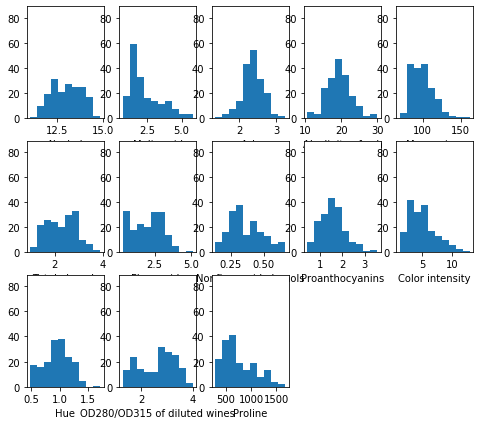

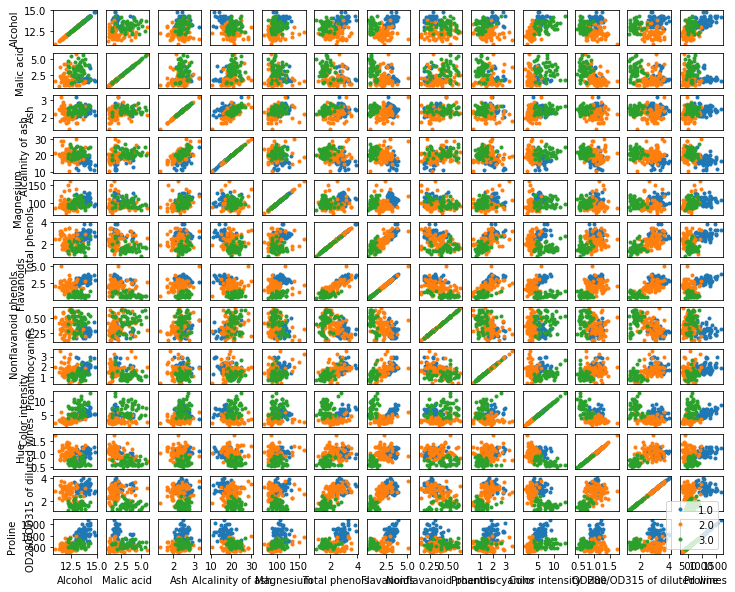

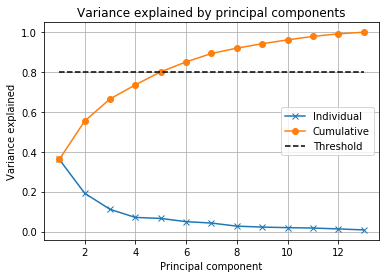

NameError: name 'title' is not defined

<Figure size 432x288 with 0 Axes>

In [26]:
# exercise Load data
import numpy as np
import pandas as pd

from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, 
                               xticks, yticks,legend,show, hist, ylim)
from scipy.stats import zscore
from scipy.linalg import svd
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load the Wine csv data using the Pandas library
filename = 'wine.csv'
df = pd.read_csv(filename, header=None)

# Pandas returns a dataframe, (df) which could be used for handling the data.
# We will however convert the dataframe to numpy arrays for this course as 
# is also described in the table in the exercise
raw_data = df.values

# Notice that raw_data both contains the information we want to store in an array
# X (the sepal and petal dimensions) and the information that we wish to store 
# in y (the class labels, that is the iris species).


df.head()

# We start by making the data matrix X by indexing into data.
# We know that the attributes are stored in the thirteen columns from inspecting 
# the file.
cols = range(1, 14)  
X = raw_data[:, cols]

# We can't extract the attribute names from the csv, so we will instead define a list ourselves
attributeNames = ('Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline')

# Before we can store the class index, we need to convert the strings that
# specify the class of a given object to a numerical value. We start by 
# extracting the strings for each sample from the raw data loaded from the csv:
classLabels = raw_data[:,0] # 0 takes the first column
# Then determine which classes are in the data by finding the set of 
# unique class labels 
classNames = np.unique(classLabels)
# We can assign each type of WIne class with a number by making a
# Python dictionary as so:
classDict = dict(zip(classNames,range(len(classNames))))
# The function zip simply "zips" togetter the classNames with an integer,
# like a zipper on a jacket. 

print(classDict)

print(df.corr())

z = np.abs(zscore(df))
print(np.where(z>3))
print(Counter(np.sort(np.where(z>3)[1])))
print(len(np.where(z>3)[0]))


corr = df.drop(0, axis=1).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    attributeNames,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(attributeNames, rotation=0)


for i in range(1,13):
    h = df[i].sort_values()
    hmean = np.mean(h)
    hstd = np.std(h)
    pdf = stats.norm.pdf(h, hmean, hstd)
    plt.plot(h, pdf)
    plt.title(attributeNames[i])
    plt.show()

# With the dictionary, we can look up each data objects class label (the string)
# in the dictionary, and determine which numerical value that object is 
# assigned. This is the class index vector y:
y = np.array([classDict[cl] for cl in classLabels])
# In the above, we have used the concept of "list comprehension", which
# is a compact way of performing some operations on a list or array.
# You could read the line  "For each class label (cl) in the array of 
# class labels (classLabels), use the class label (cl) as the key and look up
# in the class dictionary (classDict). Store the result for each class label
# as an element in a list (because of the brackets []). Finally, convert the 
# list to a numpy array". 


# We can determine the number of data objects and number of attributes using 
# the shape of X
N, M = X.shape

# Finally, the last variable that we need to have the dataset in the 
# "standard representation" for the course, is the number of classes, C:
C = len(classNames)





###
# Include basic summary statistics of the attributes
att_mean  = np.mean(X,axis=0)
att_std = np.std(X,axis=0)
att_median = np.median(X,axis=0)
att_max = X.max(axis=0)
att_min = X.min(axis=0)
att_range = att_max - att_min

### 
#Histogram plots
figure(figsize=(8,7))
u = np.floor(np.sqrt(M)); v = np.ceil(float(M)/u)
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i], )#color=(0.2, 0.8-i*0.2, 0.4))
    xlabel(attributeNames[i])
    ylim(0,N/2)   
show()

# PLot scatter matrix
figure(figsize=(12,10))
for m1 in range(M):
    for m2 in range(M):
        subplot(M, M, m1*M + m2 + 1)
        for c in range(C):
            class_mask = (y==c)
            plot(np.array(X[class_mask,m2]), np.array(X[class_mask,m1]), '.')
            if m1==M-1:
                xlabel(attributeNames[m2])
            else:
                xticks([])
            if m2==0:
                ylabel(attributeNames[m1])
            else:
                yticks([])
            #ylim(0,X.max()*1.1)
            #xlim(0,X.max()*1.1)
legend(classNames)

show()

# Do PCA
# RENEMBER TO STANDALIZE THE DATA BEFORE!!!

X_standarized = zscore(X, ddof=1) #Do the standalization 

# PCA by computing SVD of Y
U,S,Vh = svd(X_standarized,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.8

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()


# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = X_standarized @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('Wine data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()


pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .4
r = np.arange(1,M+1)
r = r * 2
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('Wine data: PCA Component Coefficients')
plt.show()